In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.dropna()
df = df.drop(['Name'], axis=1)

In [6]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

scaler = StandardScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,-0.529366,1,0,-0.503586
1,1,1,0,0.604265,1,0,0.783412
2,1,3,0,-0.245958,0,0,-0.490020
3,1,1,0,0.391709,1,0,0.417948
4,0,3,1,0.391709,0,0,-0.487507


In [7]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = BernoulliNB()
model.fit(X_train, y_train)

model.classes_

array([0, 1], dtype=int64)

In [13]:
pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Accuracy: {}\nF1 score: {}".format(acc, f1))

Accuracy: 0.7752808988764045
F1 score: 0.6808510638297872


<AxesSubplot:>

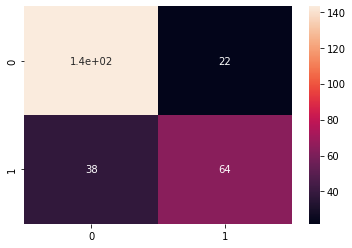

In [15]:
labels = [0,1]
cm = confusion_matrix(y_test, pred,labels=labels)

import seaborn as sns
sns.heatmap(cm,annot=True)

AUC 0.7905019799673888
ROC Curve


<AxesSubplot:>

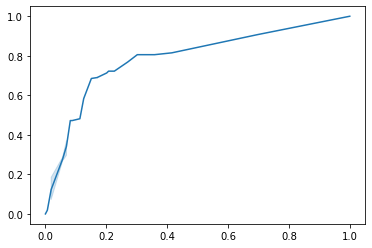

In [16]:
prob = model.predict_proba(X_test)
prob = prob[:,1]
fpr, tpr, _ = roc_curve(y_test, prob)

print("AUC", auc(fpr, tpr))

print("ROC Curve")
sns.lineplot(x=fpr, y=tpr)